## 기본 세팅

In [1]:
from google.colab import drive
drive.mount('/content/data') # 드라이브 연결

Mounted at /content/data


In [2]:
# 데이터 분석에 사용할 라이브러리
import pandas as pd
import numpy as np
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [3]:
# 코렙 한글깨짐 방지
!apt -qq -y install fonts-nanum > /dev/null

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=fontpath).get_name() 
# fm._rebuild()  


# %config InlineBackend.figure_format = 'retina'

# plt.rc('font', family=font_name)  
# plt.rcParams['axes.unicode_minus'] = False 

# Data 처리

## 데이터 로드

In [58]:
DATA_PATH = "/content/data/MyDrive/machine learning/data/Titanic.csv"
df = pd.read_csv(DATA_PATH)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [60]:
df.columns = [col.lower() for col in df.columns] # 컬럼명 소문자로 변환
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [8]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 타겟 데이터 확인

In [9]:
new_survived = pd.Categorical(df["survived"])
new_survived[:5] # survived를 카테고리로 만들고 5게만 추출

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [ ]:
new_survived = pd.Categorical(df["survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              
print(new_survived[:5])
new_survived.describe()
# 각 카테고리의 이름을 붙여줌 

## 데이터 분리

In [19]:
from sklearn.model_selection import train_test_split
SEED = 42

In [ ]:
X = df.drop('survived', axis=1)
y = df['survived']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=SEED, test_size = 0.2)
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape, X_te.shape

## 필요없는 데이터

### 중복값 제거

In [ ]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
# 중복값 제거 (첫번쨰 값을 남기고 원래 인덱스 무시)

### 데이터 확인

In [22]:
df['passengerid'].nunique() # 고유값 개수

891

In [ ]:
X_tr.info()

In [ ]:
X_tr.isnull().sum().sum() # 전체 결측치 수

In [ ]:
X_tr.isnull().sum().sort_values(ascending=False) # 각 컬럼별 결측치 수

## 그래프 탐색

<Axes: >

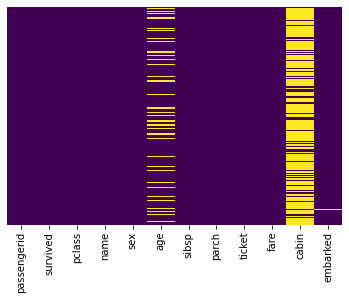

In [24]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
# 결측값 막대 그래프 
total = X_tr.isnull().sum().sort_values(ascending=False)
percent = (X_tr.isnull().sum()/X_tr.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head()
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [28]:
X_tr['hasCabin'] = X_tr['cabin'].isnull().apply(lambda x: 0 if x == True else 1)
X_tr['hasAge'] = X_tr['age'].isnull().apply(lambda x: 0 if x == True else 1)
# null값면 0 아니면 1로 변환을 시켜줌 

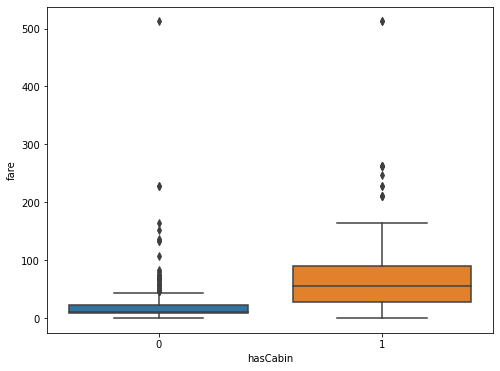

In [30]:
data = pd.concat([X_tr['fare'], X_tr['hasCabin']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='hasCabin', y="fare", data=data)

# 그래프를 그려보면 값이 있는 사람들이 더 fare가 높았음  

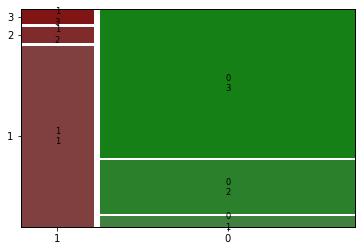

In [34]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(X_tr, ['hasCabin', 'pclass'],gap=0.02)
plt.show()
# 그래프를 그려보면 pclass 3>2>1 순으로 hascabin이 0일 확률이 높다.

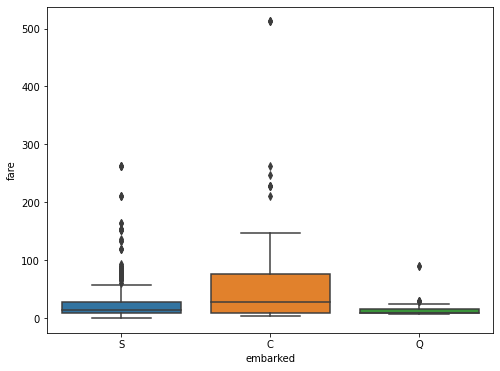

In [35]:
data = pd.concat([X_tr['fare'], X_tr['embarked']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='embarked', y="fare", data=data)
# embarked는 C>S>Q순서로 fare 가 높았음 

<Axes: xlabel='embarked', ylabel='fare'>

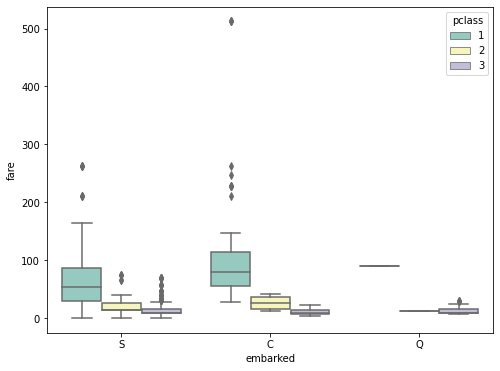

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="embarked", y="fare", hue="pclass",
               data=X_tr, palette="Set3")
# pclass 가 낮을수록 , C>S>Q 순서로 fare가 높았음 

## 결측치 처리

#### 제거

In [ ]:
df_droprows = X_tr.dropna(axis=0) # 결측치가 있는 행 제거 
df_droprows = X_tr.dropna(axis=1) # 결측치가 있는 열 제거 

#### 수치형 치환

In [ ]:
X_tr['age_mean'] = X_tr['age'].fillna(X_tr['age'].mean())
X_tr['age_median'] = X_tr['age'].fillna(X_tr['age'].median())

In [37]:
X_tr['age']

0      45.5
1      23.0
2      32.0
3      26.0
4       6.0
       ... 
707    21.0
708     NaN
709    41.0
710    14.0
711    21.0
Name: age, Length: 712, dtype: float64

In [38]:
X_tr['age_random'] = X_tr['age']

# random sampling
random_sampling = (X_tr['age'].dropna().sample(X_tr['age'].isnull().sum()))
random_sampling.index = X_tr[lambda x: x['age'].isnull()].index # index 부여

# 랜덤값으로 치환
X_tr.loc[X_tr['age'].isnull(), 'age_random'] = random_sampling


#### 범주형 치환

In [40]:
# 범주 별 빈도 수 확인
X_tr['embarked'].value_counts(dropna=False)

S      525
C      125
Q       60
NaN      2
Name: embarked, dtype: int64

In [39]:
# 최빈값
embarked_mode = X_tr['embarked'].mode().values[0]

# 최빈값으로 NA 대체
X_tr['embarked_filled'] = X_tr['embarked'].fillna(embarked_mode)
X_te['embarked_filled'] = X_te['embarked'].fillna(embarked_mode)

# 확인
print(X_tr[['embarked', 'embarked_filled']].isnull().sum())
print('-'*50)
print(X_te[['embarked', 'embarked_filled']].isnull().sum())

embarked           2
embarked_filled    0
dtype: int64
--------------------------------------------------
embarked           0
embarked_filled    0
dtype: int64


#### sklearn사용

In [ ]:
from sklearn.impute import SimpleImputer
# SimpleImputer 모델 기반 

# strategy = mean, median, most_frequent 다 가능 
imputer = SimpleImputer(strategy="mean")

X_tr['age_simple_mean'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_simple_mean'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_simple_mean']].isnull().sum()

In [ ]:
from sklearn.impute import KNNImputer
# KNNImputer 모델 기반 

imputer = KNNImputer(n_neighbors=5)

X_tr['age_knn'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_knn'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_knn']].isnull().sum()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# IterativeImputer 모델 기반 

imputer = IterativeImputer(random_state=SEED)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[["age"]])
X_te['age_iter_none'] = imputer.transform(X_te[["age"]])

X_tr[['age', 'age_iter_none']].isnull().sum()

## 비대칭 데이터 확인

In [ ]:
df['fare'].skew() # 왜도
df['fare'].kurt() # 첨도 

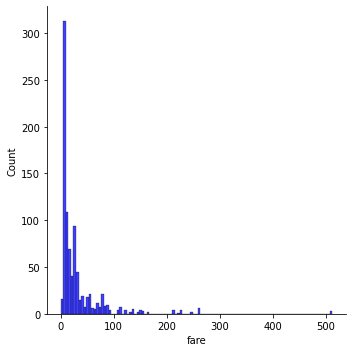

In [41]:
sns.displot(df["fare"], color="b", label="Skewness : %.2f"%(df["fare"].skew()))
# 비대칭 정도 확인 

#### 비대칭 데이터 처리

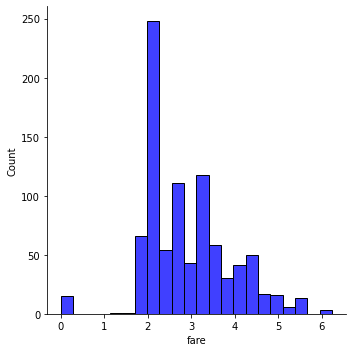

In [42]:
df["fare"] = df["fare"].map(lambda i: np.log(i) if i > 0 else 0) # log를 이용하여 비대칭 처리(0보다 크면 로그로 처리)
sns.displot(df["fare"], color="b", label="Skewness : %.2f"%(df["fare"].skew())) # 시각화

## 이상치

#### 이상치 확인

<Axes: ylabel='age'>

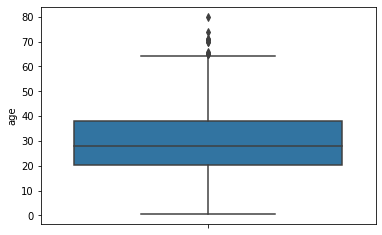

In [43]:
sns.boxplot(y=df['age'], data=df)

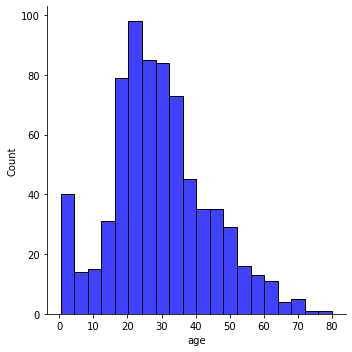

In [44]:
sns.displot(df["age"], color="b", label="Skewness : %.2f"%(df["age"].skew()))

<Axes: xlabel='survived', ylabel='age'>

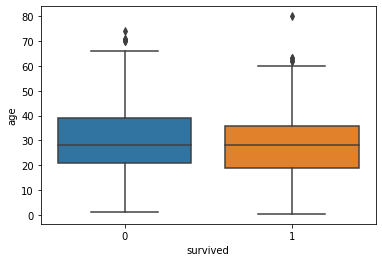

In [45]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)

In [46]:
df.groupby(['survived'])['age'].quantile([0.25, 0.75]) # 분위수 계산

survived      
0         0.25    21.0
          0.75    39.0
1         0.25    19.0
          0.75    36.0
Name: age, dtype: float64

In [47]:
df['age'].quantile([0.25, 0.5, 0.75])

0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64

In [48]:
quantiles = df['age'].quantile([0.25, 0.75]).values

IQR = quantiles[1] - quantiles[0]
Upper_boundary = quantiles[1] + 1.5*IQR
Lower_boundary = quantiles[0] - 1.5*IQR
print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

age outliers are values < -6.6875 or > 64.8125


In [ ]:
cond1 = df['age'] > Upper_boundary
cond2 = df['age'] < Lower_boundary

cond = cond1 | cond2
outlier = df.loc[cond]
print(outlier.shape, df.shape)
outlier.head()

In [ ]:
c1 = outlier['age'] >= Lower_boundary
c2 = outlier['age'] <= Upper_boundary

c = c1 & c2

outlier.loc[c].shapequantiles

#### 이상치 처리

In [66]:
df['age'] = df['age'].map(lambda x: Upper_boundary if x > Upper_boundary else x)
df['age'] = df['age'].map(lambda x: Lower_boundary if x < Lower_boundary else x)
df['age'] # 이상값 처리 

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [62]:
cond1 = df['age'] > Upper_boundary
cond2 = df['age'] < Lower_boundary

cond = cond1 | cond2
outlier = df.loc[cond]
# print(outlier.shape, df.shape)
outlier['age'] # 이상 값 들 

33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64

<Axes: ylabel='age'>

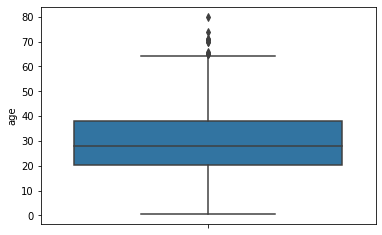

In [63]:
sns.boxplot(y=df['age'], data=df)

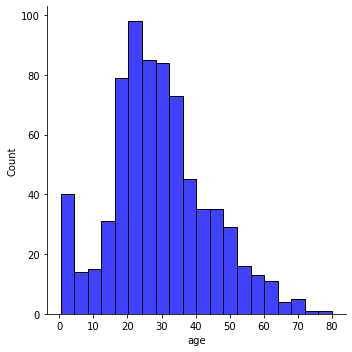

In [64]:
sns.displot(df["age"], color="b", label="Skewness : %.2f"%(df["age"].skew()))

<Axes: xlabel='survived', ylabel='age'>

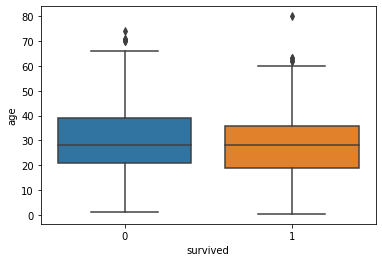

In [65]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)